# Project: Churn prediction for telecommunication business

# 1. Set Working Directory

In [1]:
import os

os.chdir('S:\Data Science Projects\Data-Science-Projects\Telecom-Churn-Analysis')

# 2. Import Libraries

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 3. Import Data

In [3]:
# Import train dataset

df_train = pd.read_csv('churnTrain.csv')

df_train.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [4]:
df_train.shape

(2666, 20)

In [5]:
# Import test dataset

df_test = pd.read_csv('churnTest.csv')

df_test.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True


In [6]:
df_test.shape

(667, 20)

# 4. Data Exploration

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                  3333 non-null object
Account_Length         3333 non-null int64
Area_Code              3333 non-null int64
Phone_No               3333 non-null int64
International_Plan     3333 non-null object
Voice_Mail_Plan        3333 non-null object
No_Vmail_Messages      3333 non-null int64
Total_Day_minutes      3333 non-null float64
Total_Day_Calls        3333 non-null int64
Total_Day_charge       3333 non-null float64
Total_Eve_Minutes      3333 non-null float64
Total_Eve_Calls        3333 non-null int64
Total_Eve_Charge       3333 non-null float64
Total_Night_Minutes    3333 non-null float64
Total_Night_Calls      3333 non-null int64
Total_Night_Charge     3333 non-null float64
Total_Intl_Minutes     3333 non-null float64
Total_Intl_Calls       3333 non-null int64
Total_Intl_Charge      3333 non-null float64
No_CS_Calls            3333 non-null int64
Churn         

In [8]:
# Check for Null Values in train dataset

df_train.isna().sum()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

No missing values in train dataset, let's check for missing values in test dataset

In [8]:
# Check for Null Values in test dataset

df_test.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No null values in test dataset either, we are good to go.

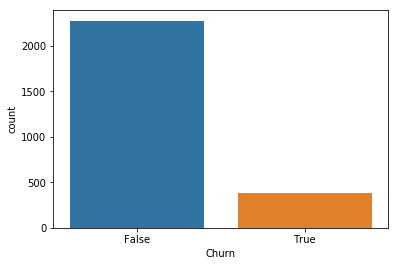

In [9]:
ax = sns.countplot(x="Churn", data=df_train)

In [10]:
df_train.Churn.value_counts()

False    2278
True      388
Name: Churn, dtype: int64

### Converting categorical variable to binary

In [19]:
df_train['International plan'] = np.where(df_train['International plan']=="Yes", 1, 0)

df_train['Voice mail plan'] = np.where(df_train['Voice mail plan']=="Yes", 1, 0)

df_train.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [22]:
df_test['International plan'] = np.where(df_test['International plan']=="Yes", 1, 0)

df_test['Voice mail plan'] = np.where(df_test['Voice mail plan']=="Yes", 1, 0)

df_test.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True


### State-wise churn count

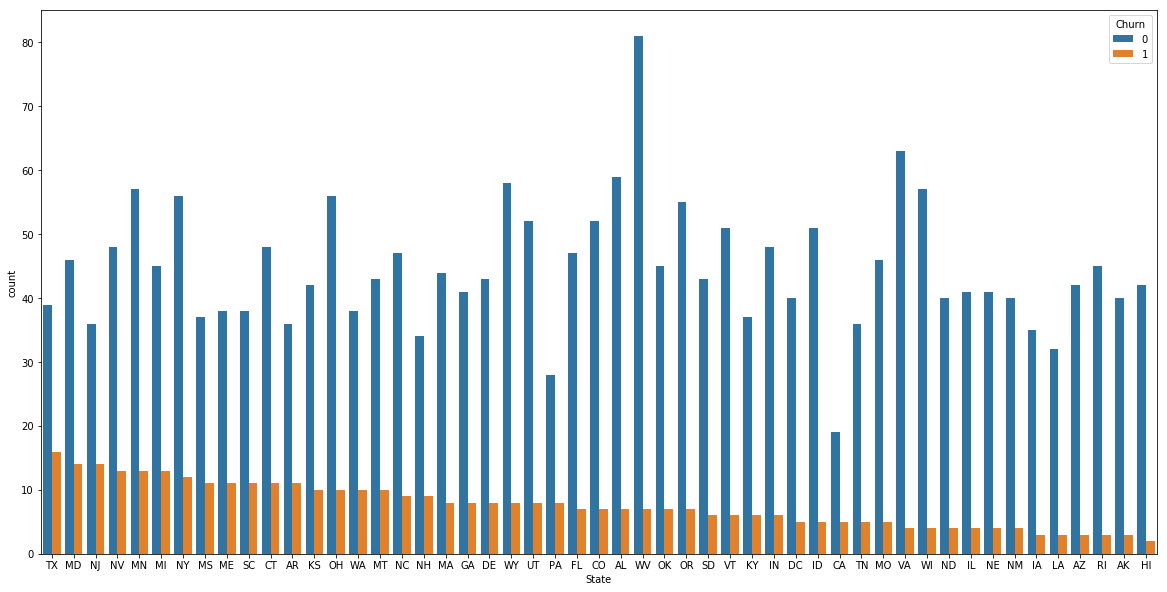

In [20]:
# Plotting state-wise churned users

fig, ax = plt.subplots(figsize=(20, 10))

order = df_train.groupby(['State']).sum()['Churn'].sort_values(ascending=False).index.values

ax = sns.countplot(x="State", hue="Churn", data=df_train, order=order)

From above plot, State TX has highest churned user and HI has least churned users

In [24]:
# Keeping only continuous and binary features

# Dropping State, Account_Length, Area_Code

df_train.drop(columns=['State', 'Account length', 'Area code'], inplace=True)

df_test.drop(columns=['State', 'Account length', 'Area code'], inplace=True)

### Correlation matrix & Correlation Heat-map

In [25]:
corr_matrix = df_train.corr()
corr_matrix

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
International plan,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,-0.010310,0.018081,-0.010316,0.053162,0.011549,0.053037,-0.035955,0.277489
Voice mail plan,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,0.001065,0.013985,0.001066,-0.013963,0.015196,-0.013931,-0.022054,-0.099291
Number vmail messages,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,-0.004277,-0.007541,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.049555,0.013439,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,0.026616,0.019132,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.010277,0.003404,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
Total eve charge,0.026623,0.019147,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
Total night minutes,-0.010310,0.001065,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


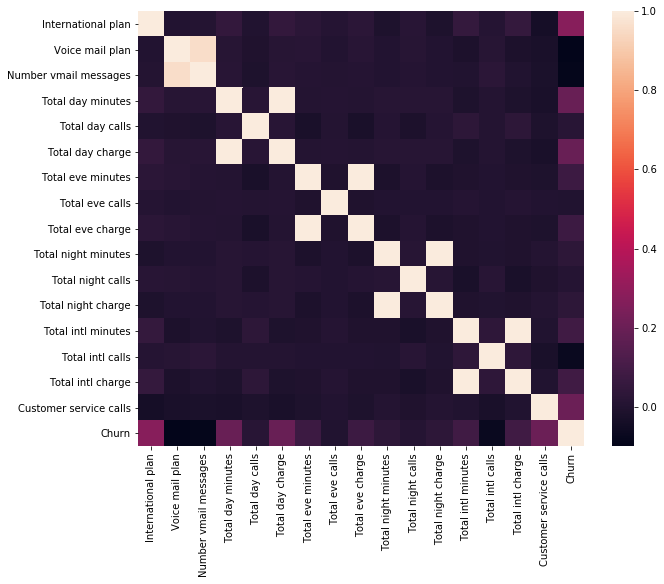

In [26]:
plt.figure(figsize = (10,8))

sns.heatmap(corr_matrix)
plt.show()

### Conclusion: From above correlation matrix, variables Voice mail plan, Total day minutes, Total eve minutes, Total night minutes, Total intl minutes look to be highly correlated between themselves, hence omitting them

In [29]:
# Dropping features, Total_Day_minutes, Total_Eve_Minutes, Total_Night_Minutes, Total_Intl_Minutes due to high collinearity

df_train.drop(columns=['Voice mail plan', 'Total day minutes', 'Total eve minutes', 'Total night minutes',
                       'Total intl minutes'], inplace=True)

df_test.drop(columns=['Voice mail plan', 'Total day minutes', 'Total eve minutes', 'Total night minutes',
                       'Total intl minutes'], inplace=True)

# 5. Modelling

## 5.1 Logistic Regression

In [31]:
# Separate the Feature and Target Variables for train dataset

X_train = df_train.loc[:, df_train.columns != 'Churn']

y_train = df_train['Churn']

In [32]:
# Modelling

X_train = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.326626
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2654
Method:                           MLE   Df Model:                           11
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                  0.2127
Time:                        10:44:03   Log-Likelihood:                -870.79
converged:                       True   LL-Null:                       -1106.1
                                        LLR p-value:                 5.894e-94
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7.8557      0.779    -10.086      0.000      -9.382      

### Conclusion 1: From above summary, we see that for telecommunication business, features like International plan, Total intl charge & Customer service calls have significant effect on Churn variable

### Conclusion 2: Also features like Total day calls, Total eve calls & Total night calls look to be insignificant with high p-values, hence omitting them and rerunning the Logit Model

In [33]:
# removing the features with high p-values 

df_train.drop(columns=['Total day calls', 'Total eve calls', 'Total night calls'], inplace=True)

df_test.drop(columns=['Total day calls', 'Total eve calls', 'Total night calls'], inplace=True)

In [34]:
# Separate the Feature and Target Variables for train dataset

X_train = df_train.loc[:, df_train.columns != 'Churn']

y_train = df_train['Churn']

In [35]:
# Modelling

X_train = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.326840
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2657
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                  0.2122
Time:                        10:46:26   Log-Likelihood:                -871.36
converged:                       True   LL-Null:                       -1106.1
                                        LLR p-value:                 2.485e-96
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7.5014      0.560    -13.395      0.000      -8.599      

### Conclusion: From above summary, the model still identifies the same features i.e, International plan, Total intl charge & Customer service calls to have significant effect on Churn variable.

In [36]:
# Separate the Feature and Target Variables for test dataset

X_test = df_test.loc[:, df_train.columns != 'Churn']

y_test = df_test['Churn']

In [43]:
# Prediction

X_test = sm.add_constant(X_test)

y_pred = log_reg.predict(X_test)

In [53]:
y_pred_bin = list(map(round, y_pred))

In [63]:
# confusion matrix

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_bin))

Confusion matrix: 
 [[551  21]
 [ 77  18]]


In [70]:
# accuracy score of Logit model

print('Test accuracy: ', round(accuracy_score(y_test, y_pred_bin), 5))

Test accuracy:  0.85307
